In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

# Show version of scikit-learn
import sklearn
sklearn.__version__


/Users/darioholenstein/Documents/zhaw/data-analytics/data_analytics/Week_09


'1.3.0'

In [2]:
# Read and select variables
df_supermarkets = pd.read_csv("supermarkets_data_enriched.csv", sep=",", encoding="utf-8")[['id',
                                                                                            'bfs_name',
                                                                                            'bfs_number',
                                                                                            'lat',
                                                                                            'lon',
                                                                                            'brand',
                                                                                            'pop',
                                                                                            'pop_dens',
                                                                                            'frg_pct',
                                                                                            'emp']]

# Number of rows and columns
print(df_supermarkets.shape)

# First records
df_supermarkets.head(5)

(3242, 10)


,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
0,33126515,Schänis,3315,47.155616,9.037915,Spar,3876,97.142857,13.054696,1408.0
1,280130028,Schänis,3315,47.155492,9.039666,ALDI,3876,97.142857,13.054696,1408.0
2,6122906632,Schänis,3315,47.158959,9.044477,Denner,3876,97.142857,13.054696,1408.0
3,9019298862,Schänis,3315,47.155185,9.038472,Lidl,3876,97.142857,13.054696,1408.0
4,36726161,Uznach,3339,47.226191,8.980329,Migros,6489,860.610080,27.862537,3500.0


In [3]:
df_supermarkets = df_supermarkets.dropna()

df_sub = df_supermarkets.loc[df_supermarkets['brand'].isin(["Volg", "Migros"])]
df_sub.head()

,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
4,36726161,Uznach,3339,47.226191,8.980329,Migros,6489,860.610080,27.862537,3500.0
8,48932835,Zürich,261,47.375020,8.522895,Migros,420217,4778.994655,32.458468,491193.0
11,83330862,Zürich,261,47.344749,8.529981,Migros,420217,4778.994655,32.458468,491193.0
12,119249170,Zürich,261,47.375255,8.536107,Migros,420217,4778.994655,32.458468,491193.0
15,262400822,Zürich,261,47.364072,8.530945,Migros,420217,4778.994655,32.458468,491193.0


In [4]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df_sub[['pop', 
                                                            'pop_dens',
                                                            'frg_pct']], 
                                                            df_sub['brand'], 
                                                            test_size=0.50, 
                                                            random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
         pop     pop_dens    frg_pct
293   173232  7263.396226  37.955459
2568    7046   155.712707   9.466364
1175   10990   739.569314  26.669700
1436    3793   545.755396  31.953599
57    420217  4778.994655  32.458468 

y_train:
293     Migros
2568    Migros
1175    Migros
1436    Migros
57      Migros
Name: brand, dtype: object


In [5]:
# Initialize the classification tree model 
clf = DecisionTreeClassifier(random_state=20, 
                             max_depth=5)

# Train the classification tree model 
clf = clf.fit(X_train, y_train)

# Make model predictions
y_pred = clf.predict(X_test)
y_pred

array(['Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Volg', 'Migros', 'Volg', 'Volg', 'Volg',
       'Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Volg', 'Migros',
       'Volg', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Volg', 'Volg', 'Migros', 'Volg', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Volg', 'Volg', 'Migros', 'Volg',
       'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Volg',
       'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Volg',
       'Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Volg',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros', 'Volg',


In [6]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred), '\n')

# Classification report
print('Classification report')
print(classification_report(y_test, y_pred))

Confusion matrix
[[215  31]
 [ 35  67]] 

Classification report
              precision    recall  f1-score   support

      Migros       0.86      0.87      0.87       246
        Volg       0.68      0.66      0.67       102

    accuracy                           0.81       348
   macro avg       0.77      0.77      0.77       348
weighted avg       0.81      0.81      0.81       348



In [7]:
# Text representation of the classification tree
text_rep = tree.export_text(clf, 
                            feature_names=list(X_train.columns))

# Print text_representation
print(text_rep)

|--- pop <= 3118.00
|   |--- frg_pct <= 22.70
|   |   |--- pop <= 2598.50
|   |   |   |--- pop_dens <= 152.62
|   |   |   |   |--- pop_dens <= 139.09
|   |   |   |   |   |--- class: Volg
|   |   |   |   |--- pop_dens >  139.09
|   |   |   |   |   |--- class: Migros
|   |   |   |--- pop_dens >  152.62
|   |   |   |   |--- class: Volg
|   |   |--- pop >  2598.50
|   |   |   |--- frg_pct <= 10.61
|   |   |   |   |--- class: Migros
|   |   |   |--- frg_pct >  10.61
|   |   |   |   |--- pop <= 2666.50
|   |   |   |   |   |--- class: Volg
|   |   |   |   |--- pop >  2666.50
|   |   |   |   |   |--- class: Volg
|   |--- frg_pct >  22.70
|   |   |--- pop <= 1892.50
|   |   |   |--- class: Volg
|   |   |--- pop >  1892.50
|   |   |   |--- pop_dens <= 272.65
|   |   |   |   |--- class: Volg
|   |   |   |--- pop_dens >  272.65
|   |   |   |   |--- pop_dens <= 608.24
|   |   |   |   |   |--- class: Migros
|   |   |   |   |--- pop_dens >  608.24
|   |   |   |   |   |--- class: Volg
|--- pop >  3118

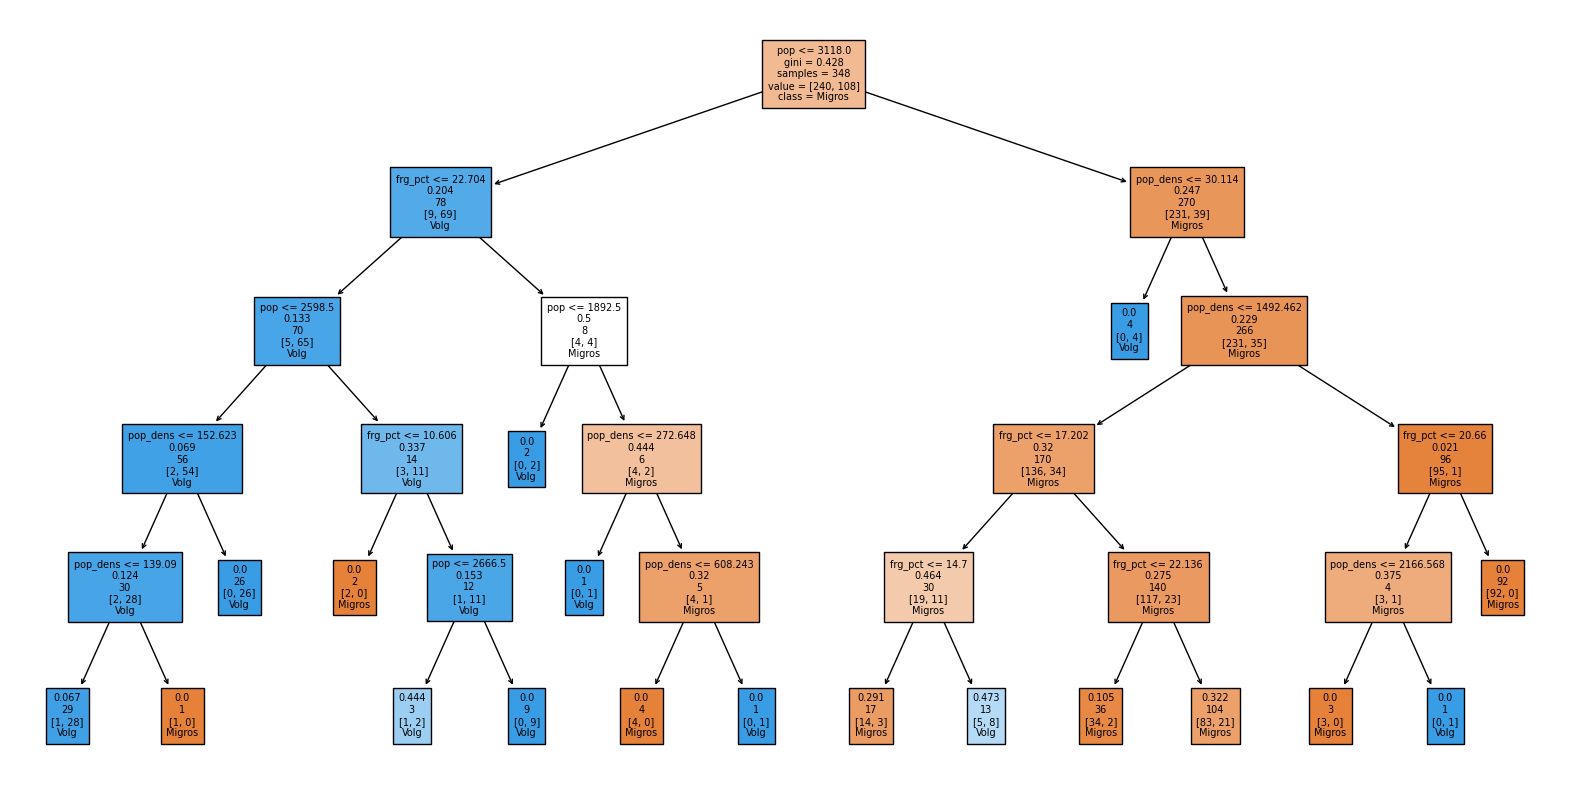

In [8]:
# For the meaning of numbers in boxes see root node
fig = plt.figure(figsize=(20,10))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['Migros', 'Volg'],
                   filled=True,
                   fontsize=7,
                   label='root')

In [9]:
# Create train and test samples
X2_train, X2_test, y2_train, y2_test = train_test_split(df_sub[['pop', 
                                                            'pop_dens',
                                                            'frg_pct']], 
                                                            df_sub['brand'], 
                                                            test_size=0.50, 
                                                            random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
         pop     pop_dens    frg_pct
293   173232  7263.396226  37.955459
2568    7046   155.712707   9.466364
1175   10990   739.569314  26.669700
1436    3793   545.755396  31.953599
57    420217  4778.994655  32.458468 

y2_train:
293     Migros
2568    Migros
1175    Migros
1436    Migros
57      Migros
Name: brand, dtype: object


In [10]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=20, max_depth=10)

# Train the random forest classifier
rfc = rfc.fit(X2_train, y2_train)

# Predict the target variable (0 = not survived, 1 = survived)
y_pred_rf = rfc.predict(X2_test)

print('Predicted target variable (0 = not survived, 1 = survived)')
y_pred_rf

Predicted target variable (0 = not survived, 1 = survived)


array(['Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Volg', 'Migros', 'Volg', 'Volg', 'Volg',
       'Migros', 'Volg', 'Migros', 'Migros', 'Volg', 'Volg', 'Migros',
       'Volg', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros',
       'Volg', 'Volg', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Volg', 'Volg', 'Migros', 'Volg',
       'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Volg',
       'Migros', 'Migros', 'Migros', 'Volg', 'Volg', 'Migros', 'Volg',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros', 'Volg',
  

In [11]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y2_test, y_pred_rf), '\n')

# Classification report
print('Classification report')
print(classification_report(y2_test, y_pred_rf))


Confusion matrix
[[212  34]
 [ 30  72]] 

Classification report
              precision    recall  f1-score   support

      Migros       0.88      0.86      0.87       246
        Volg       0.68      0.71      0.69       102

    accuracy                           0.82       348
   macro avg       0.78      0.78      0.78       348
weighted avg       0.82      0.82      0.82       348



Index(['pop', 'frg_pct', 'pop_dens'], dtype='object')
[0.42333812 0.30388515 0.27277673]


<Axes: ylabel='features'>

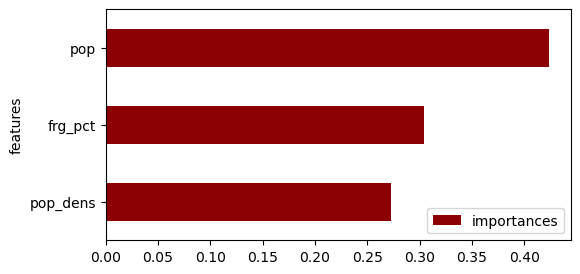

In [12]:
cols = X2_train.columns

# Derive feature importance from random forest
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

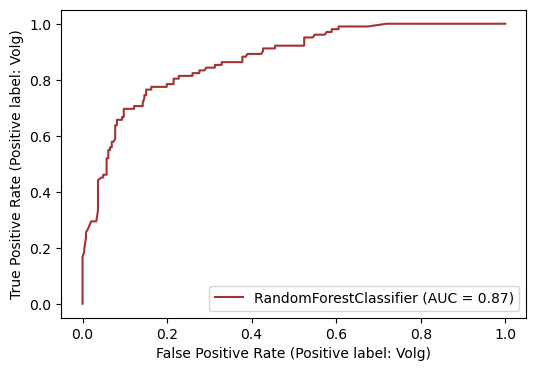

In [13]:
# Plot ROC curve and calculate AUC
plt.figure(figsize=(6,4))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, 
                                          X2_test, 
                                          y2_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.show()